# Clustering: K-Means In-Depth

Here we'll explore **K Means Clustering**, which is an unsupervised clustering technique. This notebook is a slightly adapted version from the notebook that Jake van der Plas at the Olso Machine Learning workshop. 

Let's start with our standard set of initial imports.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cross_validation import train_test_split

# Use seaborn plotting defaults
import seaborn as sns; sns.set()

/usr/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. Introducing K-Means

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the centroids (mean) of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters in 2D space. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

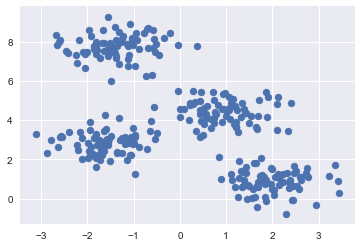

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50)

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

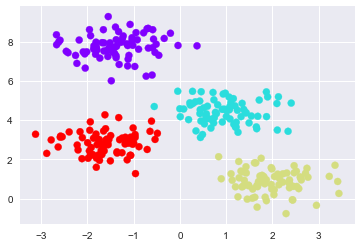

In [4]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

### KMeans Caveats

The convergence of this algorithm is not guaranteed; for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.

Also, the number of clusters must be set beforehand... there are other clustering algorithms for which this requirement may be lifted.

## 2. Application of KMeans to Iris

First let's apply KMeans to the Iris dataset. Remember, there are 4 features (sepal length, sepal width, petal length, petal width). For the moment ignore the labels (which are known for this dataset). At least do the following:

+ Load Iris dataset.
+ Apply KMeans.
+ Visualize the cluster centers in a number of 2D plots in an informative way.
+ Permute the cluster labels if necessary (they are probably not the same as the real labels).
+ How accurate is the KMeans classifier.
+ Plot the confusion matrix.

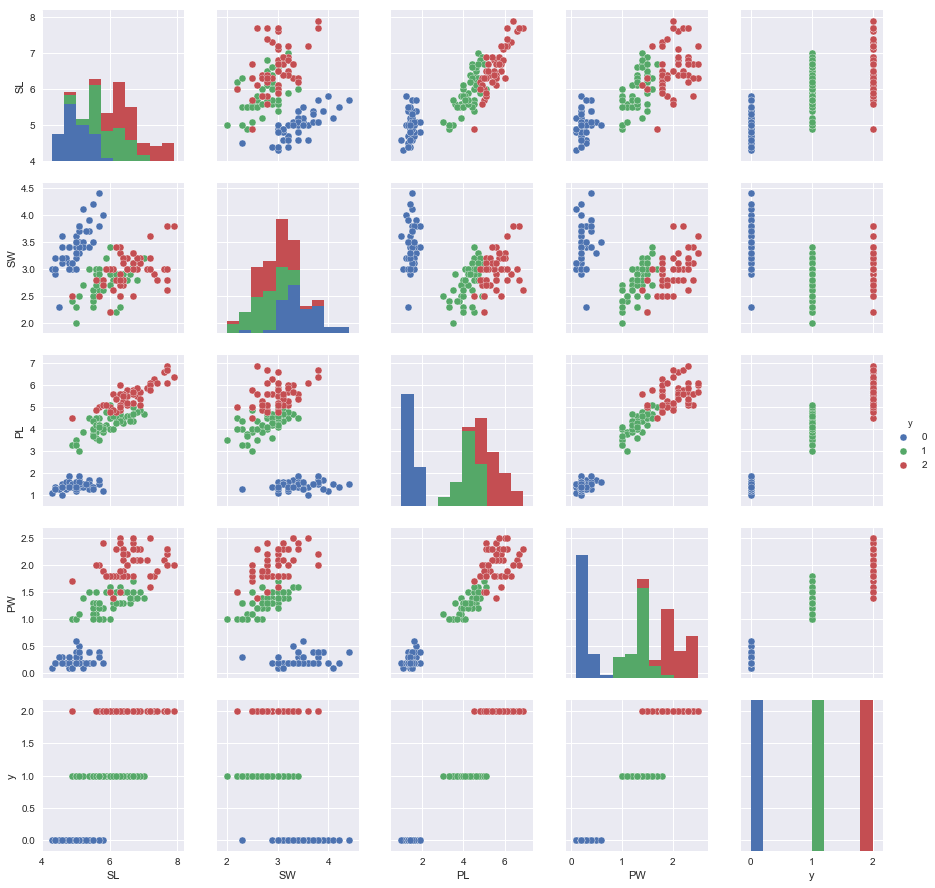

In [21]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import pandas as pd

### Insert your code here and explain your steps in markdown cells
X, y = load_iris(True)

X = pd.DataFrame(X, columns=['SL', 'SW', 'PL', 'PW'])
y = pd.Series(y, name='cls')

total = X.copy()
total['y'] = y

sns.pairplot(total, hue='y')

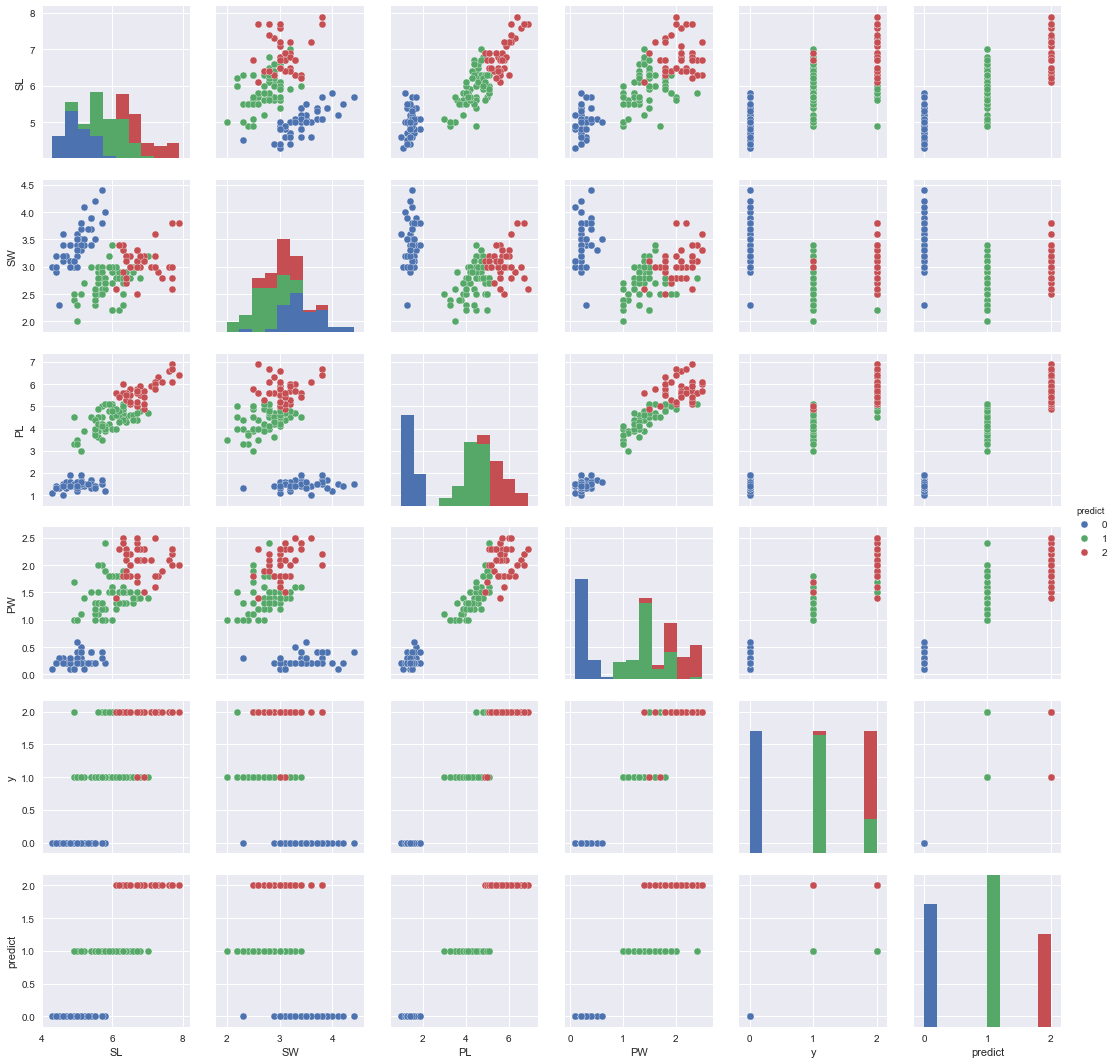

In [38]:
est = KMeans(3)

est.fit(X, y)
y_pred = est.predict(X)
total['predict'] = y_pred

sns.pairplot(total, hue='predict')

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.89333333333333331

You can see that the algoritm has no problem detecting the first class.  
But the second and third have some trouble.  

This is because they have overlap in most of the features.  
You can see in the pair plot that these two have errors in the parts they overlap.  

_Since the dataset is small, I'm not train test splitting. But this is required if you want to avoid overfitting._

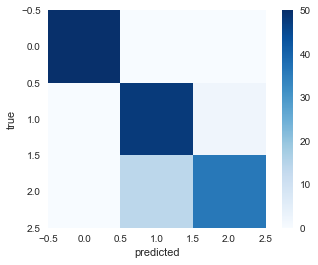

In [40]:
# Here is a piece of code to plot the confusion matrix
plt.imshow(confusion_matrix(y, y_pred), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')


## 3. Application of KMeans to Digits

For another closer-to-real-world example, let's again take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

+ Load Digits dataset.
+ Apply KMeans.
+ Visualize the averaged digits (hint reshape your 64 feature vector to an 8x8 matrix).
+ Permute the cluster labels if necessary (they are probably not the same as the real labels).
+ How accurate is the KMeans classifier?
+ Plot the confusion matrix.

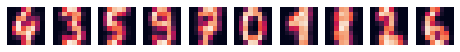

In [74]:
from sklearn.datasets import load_digits

### Insert your code here and explain your steps in markdown cells
data = load_digits()

est = KMeans(n_clusters=10, random_state=0)
clusters = est.fit_predict(data.data)

fig, ax = plt.subplots(1, 10, figsize=(8, 3))
centers = est.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center)



In [82]:
# Manually map the clusters to the correct labels
labels = pd.Series(clusters).map({ind: val for ind, val in enumerate([4, 3, 5, 9, 7, 0, 1, 8, 2, 6])})

print(accuracy_score(y, labels))

0.793544796884


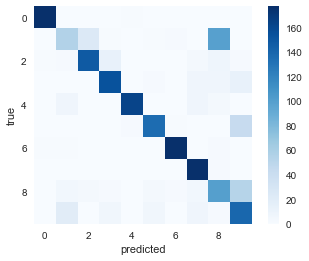

In [81]:
plt.imshow(confusion_matrix(y, labels), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

When looking at the graph in the first block you can see that the clusters of kmeans actually quite accurately represent the nubmers.  
And when looking at the confusion matrix, you can see that the most difficult ones are the 8 and the 2.  

Kmeans find clusters around the numbers and the more unique parts of the numbers help it distinguish them.